<a href="https://colab.research.google.com/github/yoshitha2005/OIBSIP/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

🔹 Model Evaluation:
✅ RMSE: 0.9517
✅ R² Score: 0.9607


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


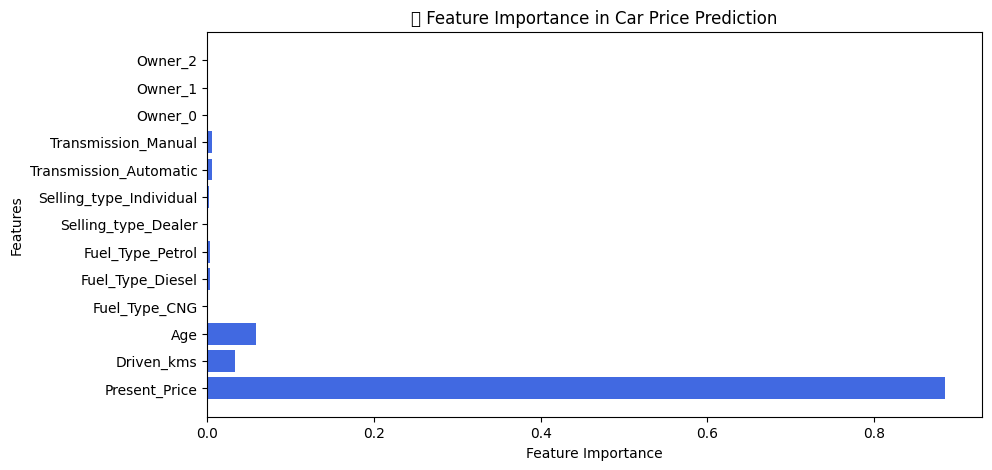

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/car data.csv')

# Display first few rows
print("Dataset Preview:\n", data.head())

# 🔹 Feature Engineering
data['Age'] = 2024 - data['Year']  # Calculate car age
data.drop(['Year', 'Car_Name'], axis=1, inplace=True)  # Drop irrelevant columns

# Handle 'Owner' column (group values 2 & 3 into a single category)
data['Owner'] = data['Owner'].apply(lambda x: 2 if x >= 2 else x)

# 🔹 Split data into features (X) and target variable (y)
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical features
numerical_features = ['Present_Price', 'Driven_kms', 'Age']
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

# 🔹 Preprocessing: Standardizing numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# 🔹 Preprocessing: One-hot encoding categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Ensure dense output

X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# Convert encoded categorical features to DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Reset index to avoid mismatch
X_train_encoded_df.index = X_train.index
X_test_encoded_df.index = X_test.index

# Concatenate numerical and categorical features
X_train_final = pd.concat([X_train[numerical_features], X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test[numerical_features], X_test_encoded_df], axis=1)

# 🔹 Train the Model with Hyperparameter Tuning
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)  # Tuned model
model.fit(X_train_final, y_train)

# 🔹 Make Predictions
y_pred = model.predict(X_test_final)

# 🔹 Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² Score

print(f'\n🔹 Model Evaluation:')
print(f'✅ RMSE: {rmse:.4f}')
print(f'✅ R² Score: {r2:.4f}')

# 🔹 Feature Importance Visualization
feature_importance = model.feature_importances_
plt.figure(figsize=(10,5))
plt.barh(X_train_final.columns, feature_importance, color='royalblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('🔹 Feature Importance in Car Price Prediction')
plt.show()
